In [1]:
import torch
import numpy as np
from hmc_u1 import HMC_U1
from hmc_u1_ft import HMC_U1_FT
from cnn_model import FieldTransformation
from utils import hmc_summary


In [2]:
# Parameters
lattice_size = 16
volume = lattice_size ** 2
beta = 5
n_thermalization_steps = 200
n_steps = 50
step_size = 0.1
n_iterations = 512

# Initialize device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = 'cpu'

# Set default type
torch.set_default_dtype(torch.float32)

### No Field Transformation

>>> No Field Transformation HMC Simulation: 


Running HMC: 100%|██████████| 512/512 [00:06<00:00, 84.01it/s]


>>> Simulation completed


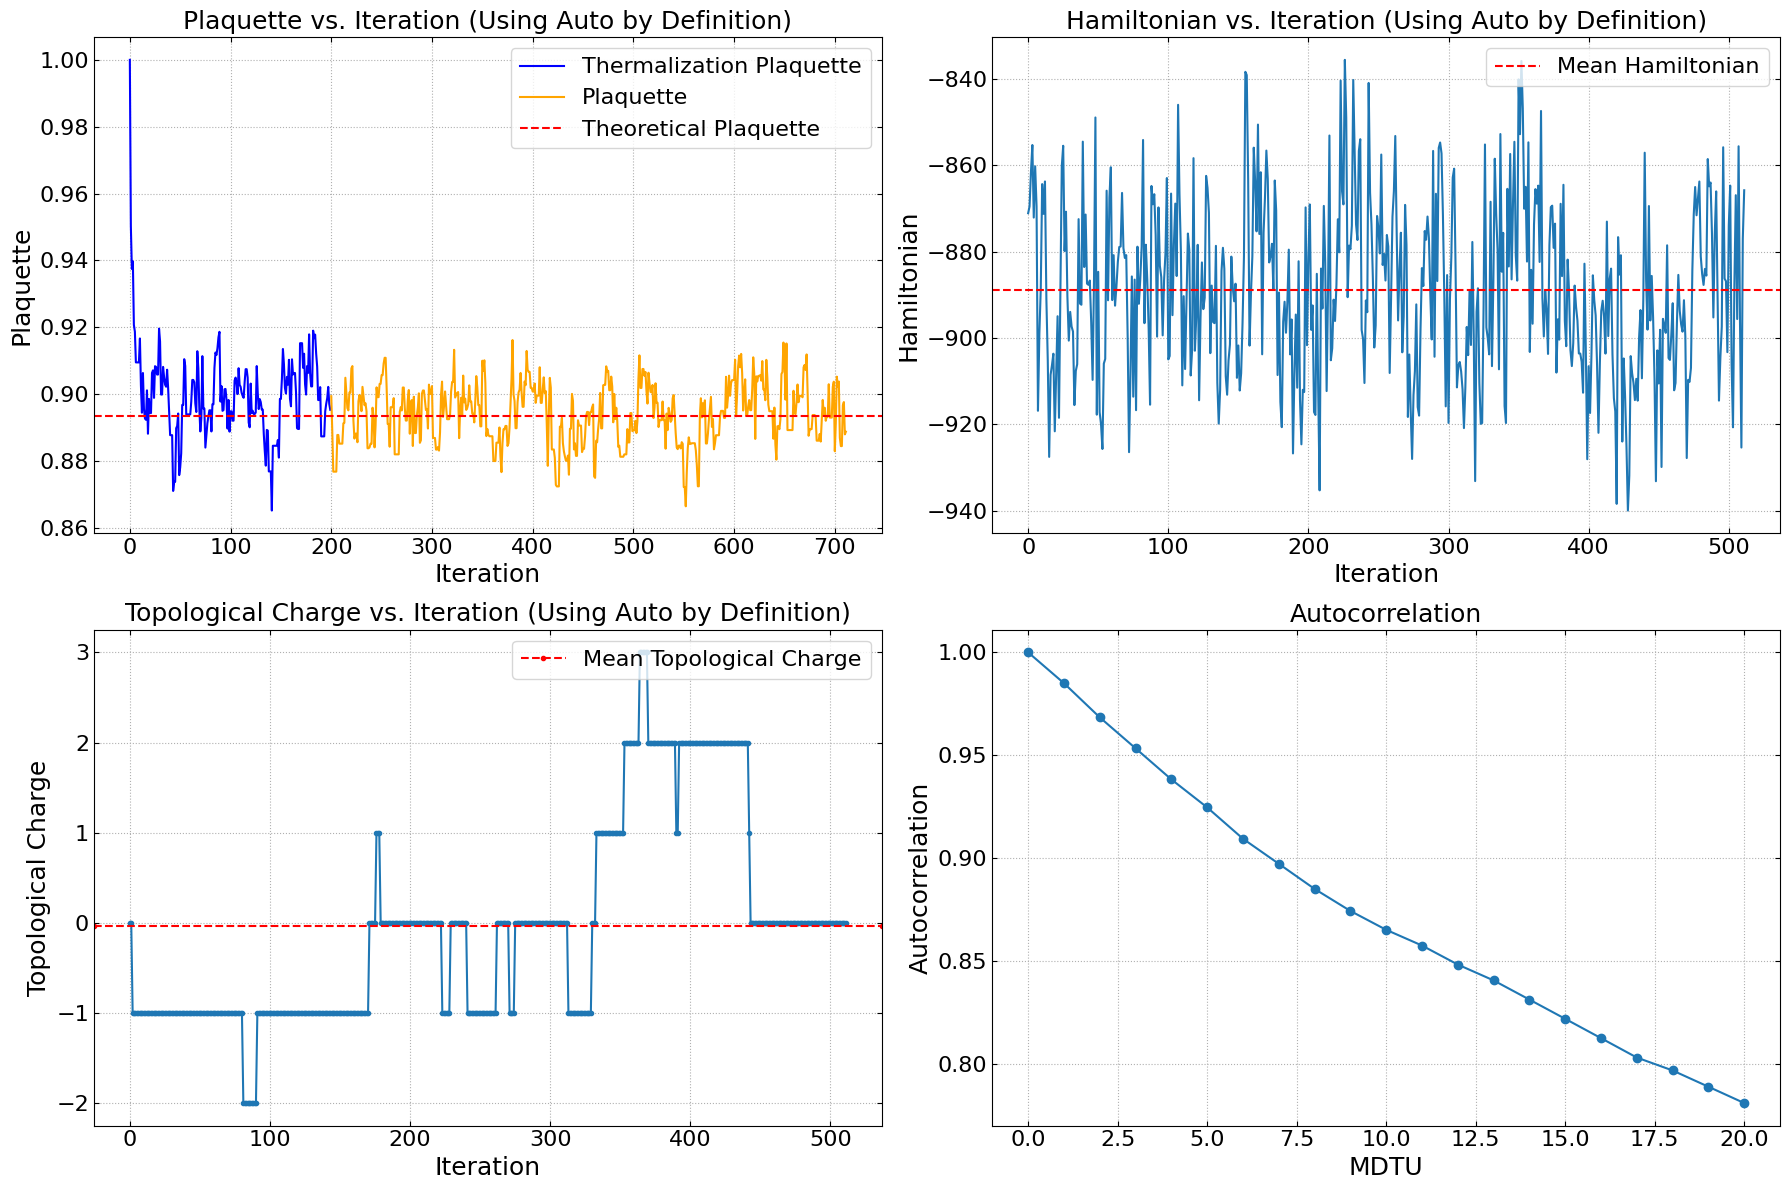

>>> Theoretical plaquette:  0.8933831370440852
>>> Mean plaq:  0.8940275878412649
>>> Std of mean plaq:  0.00038708332705635545
Thermalization acceptance rate: 0.8150
Acceptance rate: 0.7637


In [3]:
print(">>> No Field Transformation HMC Simulation: ")

# Initialize HMC
hmc = HMC_U1(lattice_size, beta, n_thermalization_steps, n_steps, step_size, device=device)

# Thermalize the system
theta_thermalized, therm_plaq_ls, therm_acceptance_rate = hmc.thermalize()

# Run HMC without field transformation
config_ls, plaq_ls, acceptance_rate, topological_charges, hamiltonians = hmc.run(n_iterations, theta_thermalized)

print(">>> Simulation completed")


# Compute autocorrelation of topological charges
max_lag = 20
hmc_summary(beta, max_lag, volume, therm_plaq_ls, plaq_ls, topological_charges, hamiltonians, therm_acceptance_rate, acceptance_rate)

# Save configurations for training
np.save('dump/theta_ori.npy', torch.stack(config_ls).detach().cpu().numpy())


### Neural Network Field Transformation

/home/jinchen/miniconda3/envs/lat/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


>>> Neural Network Field Transformation HMC Simulation: 
Loaded data shape: torch.Size([512, 2, 16, 16])
Training data shape: torch.Size([256, 2, 16, 16])
Testing data shape: torch.Size([256, 2, 16, 16])
>>> Training the model


Training epochs:   2%|▏         | 1/50 [00:00<00:30,  1.59it/s]

Epoch 1/50 - Train Loss: 2.739490 - Test Loss: 2.280129


Training epochs:   4%|▍         | 2/50 [00:01<00:30,  1.56it/s]

Epoch 2/50 - Train Loss: 2.084168 - Test Loss: 1.955248


Training epochs:   6%|▌         | 3/50 [00:01<00:29,  1.59it/s]

Epoch 3/50 - Train Loss: 1.960555 - Test Loss: 1.927139


Training epochs:   8%|▊         | 4/50 [00:02<00:28,  1.60it/s]

Epoch 4/50 - Train Loss: 1.938341 - Test Loss: 1.908098


Training epochs:  10%|█         | 5/50 [00:03<00:28,  1.60it/s]

Epoch 5/50 - Train Loss: 1.922948 - Test Loss: 1.893929


Training epochs:  12%|█▏        | 6/50 [00:03<00:27,  1.60it/s]

Epoch 6/50 - Train Loss: 1.910854 - Test Loss: 1.883504


Training epochs:  14%|█▍        | 7/50 [00:04<00:26,  1.59it/s]

Epoch 7/50 - Train Loss: 1.902624 - Test Loss: 1.875322


Training epochs:  16%|█▌        | 8/50 [00:05<00:26,  1.59it/s]

Epoch 8/50 - Train Loss: 1.895561 - Test Loss: 1.869093


Training epochs:  18%|█▊        | 9/50 [00:05<00:26,  1.57it/s]

Epoch 9/50 - Train Loss: 1.889903 - Test Loss: 1.863871


Training epochs:  20%|██        | 10/50 [00:06<00:25,  1.56it/s]

Epoch 10/50 - Train Loss: 1.884821 - Test Loss: 1.859464


Training epochs:  22%|██▏       | 11/50 [00:06<00:25,  1.56it/s]

Epoch 11/50 - Train Loss: 1.880902 - Test Loss: 1.855181


Training epochs:  24%|██▍       | 12/50 [00:07<00:24,  1.56it/s]

Epoch 12/50 - Train Loss: 1.877126 - Test Loss: 1.851800


Training epochs:  26%|██▌       | 13/50 [00:08<00:23,  1.56it/s]

Epoch 13/50 - Train Loss: 1.873852 - Test Loss: 1.848639


Training epochs:  28%|██▊       | 14/50 [00:08<00:23,  1.56it/s]

Epoch 14/50 - Train Loss: 1.870647 - Test Loss: 1.846176


Training epochs:  30%|███       | 15/50 [00:09<00:22,  1.55it/s]

Epoch 15/50 - Train Loss: 1.868134 - Test Loss: 1.843814


Training epochs:  32%|███▏      | 16/50 [00:10<00:21,  1.56it/s]

Epoch 16/50 - Train Loss: 1.865682 - Test Loss: 1.841935


Training epochs:  34%|███▍      | 17/50 [00:10<00:21,  1.55it/s]

Epoch 17/50 - Train Loss: 1.864140 - Test Loss: 1.840270


Training epochs:  36%|███▌      | 18/50 [00:11<00:20,  1.55it/s]

Epoch 18/50 - Train Loss: 1.862370 - Test Loss: 1.838713


Training epochs:  38%|███▊      | 19/50 [00:12<00:19,  1.55it/s]

Epoch 19/50 - Train Loss: 1.860964 - Test Loss: 1.837605


Training epochs:  40%|████      | 20/50 [00:12<00:19,  1.55it/s]

Epoch 20/50 - Train Loss: 1.859826 - Test Loss: 1.836602


Training epochs:  42%|████▏     | 21/50 [00:13<00:18,  1.57it/s]

Epoch 21/50 - Train Loss: 1.858857 - Test Loss: 1.836139


Training epochs:  44%|████▍     | 22/50 [00:14<00:17,  1.57it/s]

Epoch 22/50 - Train Loss: 1.858174 - Test Loss: 1.835316


Training epochs:  46%|████▌     | 23/50 [00:14<00:17,  1.58it/s]

Epoch 23/50 - Train Loss: 1.857366 - Test Loss: 1.835231


Training epochs:  48%|████▊     | 24/50 [00:15<00:16,  1.56it/s]

Epoch 24/50 - Train Loss: 1.857200 - Test Loss: 1.834957


Training epochs:  50%|█████     | 25/50 [00:15<00:16,  1.56it/s]

Epoch 25/50 - Train Loss: 1.856611 - Test Loss: 1.834485


Training epochs:  52%|█████▏    | 26/50 [00:16<00:15,  1.57it/s]

Epoch 26/50 - Train Loss: 1.856208 - Test Loss: 1.834501


Training epochs:  54%|█████▍    | 27/50 [00:17<00:15,  1.53it/s]

Epoch 27/50 - Train Loss: 1.855910 - Test Loss: 1.834371


Training epochs:  56%|█████▌    | 28/50 [00:17<00:14,  1.54it/s]

Epoch 28/50 - Train Loss: 1.855769 - Test Loss: 1.834192


Training epochs:  58%|█████▊    | 29/50 [00:18<00:13,  1.57it/s]

Epoch 29/50 - Train Loss: 1.855745 - Test Loss: 1.834141


Training epochs:  60%|██████    | 30/50 [00:19<00:12,  1.55it/s]

Epoch 30/50 - Train Loss: 1.855550 - Test Loss: 1.834115


Training epochs:  62%|██████▏   | 31/50 [00:19<00:12,  1.54it/s]

Epoch 31/50 - Train Loss: 1.855593 - Test Loss: 1.834019


Training epochs:  64%|██████▍   | 32/50 [00:20<00:11,  1.54it/s]

Epoch 32/50 - Train Loss: 1.855711 - Test Loss: 1.834230


Training epochs:  66%|██████▌   | 33/50 [00:21<00:11,  1.53it/s]

Epoch 33/50 - Train Loss: 1.855660 - Test Loss: 1.834009


Training epochs:  68%|██████▊   | 34/50 [00:21<00:10,  1.53it/s]

Epoch 34/50 - Train Loss: 1.855227 - Test Loss: 1.834122


Training epochs:  70%|███████   | 35/50 [00:22<00:09,  1.54it/s]

Epoch 35/50 - Train Loss: 1.855125 - Test Loss: 1.834235


Training epochs:  72%|███████▏  | 36/50 [00:23<00:09,  1.54it/s]

Epoch 36/50 - Train Loss: 1.855091 - Test Loss: 1.834177


Training epochs:  74%|███████▍  | 37/50 [00:23<00:08,  1.53it/s]

Epoch 37/50 - Train Loss: 1.855282 - Test Loss: 1.834177


Training epochs:  76%|███████▌  | 38/50 [00:24<00:07,  1.56it/s]

Epoch 38/50 - Train Loss: 1.855274 - Test Loss: 1.834169


Training epochs:  78%|███████▊  | 39/50 [00:24<00:06,  1.59it/s]

Epoch 39/50 - Train Loss: 1.855210 - Test Loss: 1.834148


Training epochs:  80%|████████  | 40/50 [00:25<00:06,  1.57it/s]

Epoch 40/50 - Train Loss: 1.855176 - Test Loss: 1.834260


Training epochs:  82%|████████▏ | 41/50 [00:26<00:05,  1.58it/s]

Epoch 41/50 - Train Loss: 1.854924 - Test Loss: 1.834247


Training epochs:  84%|████████▍ | 42/50 [00:26<00:05,  1.59it/s]

Epoch 42/50 - Train Loss: 1.855326 - Test Loss: 1.834273


Training epochs:  86%|████████▌ | 43/50 [00:27<00:04,  1.57it/s]

Epoch 43/50 - Train Loss: 1.855149 - Test Loss: 1.834256


Training epochs:  88%|████████▊ | 44/50 [00:28<00:03,  1.55it/s]

Epoch 44/50 - Train Loss: 1.855232 - Test Loss: 1.834264


Training epochs:  90%|█████████ | 45/50 [00:28<00:03,  1.58it/s]

Epoch 45/50 - Train Loss: 1.855288 - Test Loss: 1.834268


Training epochs:  92%|█████████▏| 46/50 [00:29<00:02,  1.57it/s]

Epoch 46/50 - Train Loss: 1.855227 - Test Loss: 1.834269


Training epochs:  94%|█████████▍| 47/50 [00:30<00:01,  1.55it/s]

Epoch 47/50 - Train Loss: 1.855198 - Test Loss: 1.834251


Training epochs:  96%|█████████▌| 48/50 [00:30<00:01,  1.57it/s]

Epoch 48/50 - Train Loss: 1.855110 - Test Loss: 1.834289


Training epochs:  98%|█████████▊| 49/50 [00:31<00:00,  1.53it/s]

Epoch 49/50 - Train Loss: 1.855225 - Test Loss: 1.834289


Training epochs: 100%|██████████| 50/50 [00:32<00:00,  1.56it/s]


Epoch 50/50 - Train Loss: 1.854914 - Test Loss: 1.834287


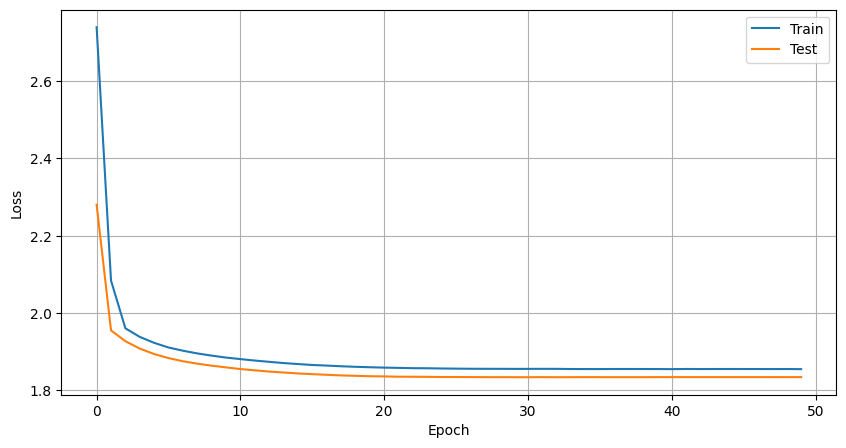

/tmp/ipykernel_3865648/2298433165.py:31: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  nn_ft.model.load_state_dict(torch.load('models/cnn_trained.pt'))


>>> Saving the trained model
>>> Model saved successfully
>>> Loading the trained model
>>> Model loaded successfully


Running HMC: 100%|██████████| 512/512 [00:39<00:00, 13.09it/s]


>>> Simulation completed


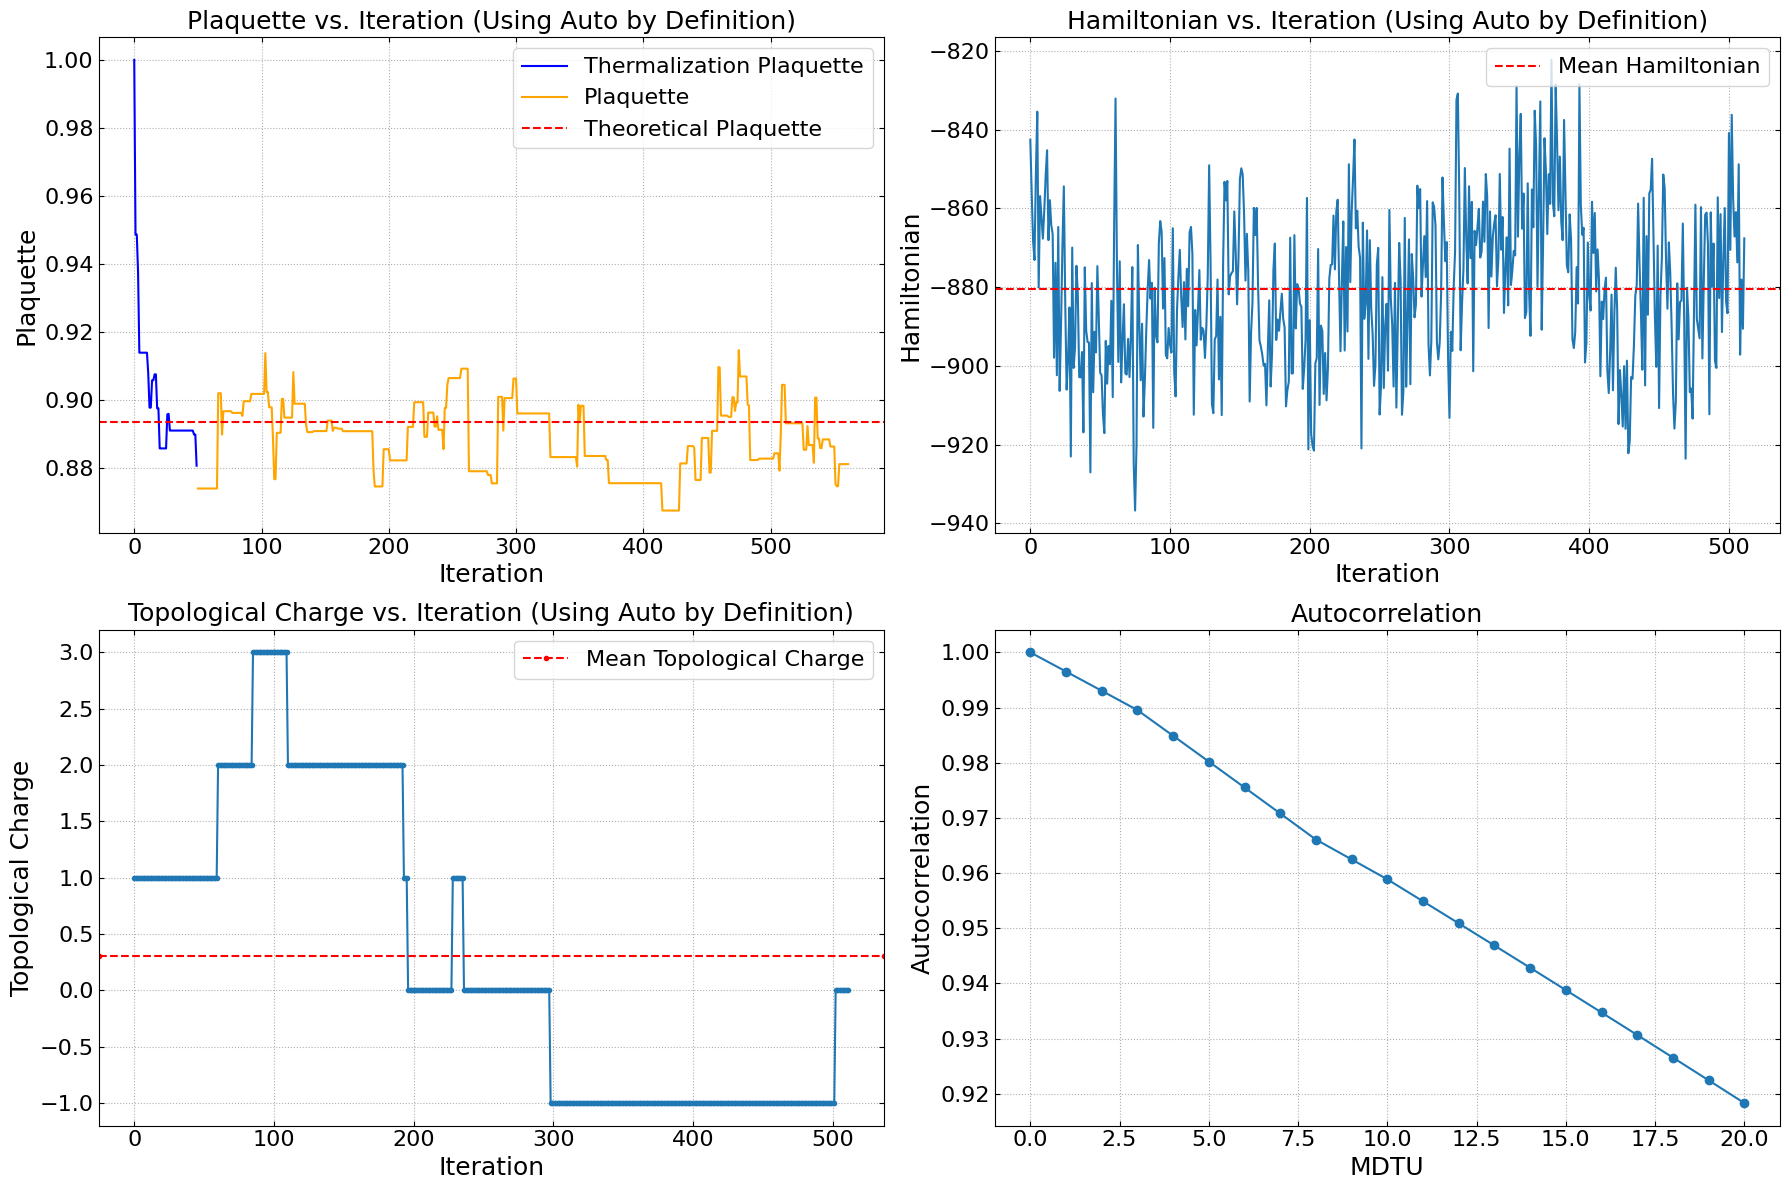

>>> Theoretical plaquette:  0.8933831370440852
>>> Mean plaq:  0.8885528232203797
>>> Std of mean plaq:  0.0004454636479046901
Thermalization acceptance rate: 0.2800
Acceptance rate: 0.1875


In [5]:
print(">>> Neural Network Field Transformation HMC Simulation: ")

# initialize the field transformation
nn_ft = FieldTransformation(lattice_size, device=device)
# nn_ft.model.load_state_dict(torch.load('models/cnn_save.pt'))

# load the data
data = np.load('dump/theta_ori.npy')
tensor_data = torch.from_numpy(data).float().to(device)
print(f"Loaded data shape: {tensor_data.shape}")

# split the data into training and testing
train_size = int(0.5 * len(tensor_data))
train_data = tensor_data[:train_size]
test_data = tensor_data[train_size:]
print(f"Training data shape: {train_data.shape}")
print(f"Testing data shape: {test_data.shape}")

# train the model
print(">>> Training the model")
nn_ft.train(train_data, test_data, beta, n_epochs=50, batch_size=4)

# Save the trained model
print(">>> Saving the trained model")
torch.save(nn_ft.model.state_dict(), 'models/cnn_trained.pt')
print(">>> Model saved successfully")


# Load the trained model
print(">>> Loading the trained model")
nn_ft.model.load_state_dict(torch.load('models/cnn_trained.pt'))
nn_ft.model.eval()
print(">>> Model loaded successfully")


field_transformation = nn_ft.field_transformation
compute_jac_logdet = nn_ft.compute_jac_logdet

# Initialize HMC with field transformation
n_thermalization_steps = 50
hmc = HMC_U1_FT(lattice_size, beta, n_thermalization_steps, n_steps, step_size, field_transformation=field_transformation, compute_jac_logdet=compute_jac_logdet, device=device)

# Thermalize the system
theta_thermalized, therm_plaq_ls, therm_acceptance_rate = hmc.thermalize()

# Run HMC without field transformation
final_config, plaq_ls, acceptance_rate, topological_charges, hamiltonians = hmc.run(n_iterations, theta_thermalized)

print(">>> Simulation completed")


# Compute autocorrelation of topological charges
max_lag = 20
hmc_summary(beta, max_lag, volume, therm_plaq_ls, plaq_ls, topological_charges, hamiltonians, therm_acceptance_rate, acceptance_rate)